In [1]:
# !pip install python-mnist

In [17]:
from matplotlib import pyplot as plt
from mnist import MNIST
import numpy as np
import time
np.random.seed(1)

In [3]:
mnist = MNIST('MNIST')
rs, rl = mnist.load_training()      #60000 samples
ts, tl = mnist.load_testing()       #10000 samples
train_set = np.asarray(rs)
train_labels = np.asarray(rl)
test_set = np.asarray(ts)
test_labels = np.asarray(tl)  

In [18]:
sizes = [784, 200, 100, 10]     # The number of neurons per layer (input, hidden_layer_1, hidden_layer_2, output_layer)
epochs = 10                     # The number of epochs (epochs * batch MUST == 60,000 !!!!!)
eta = 0.01                     # The learning rate (eta)
batch = 6000                    # Using batch learning for faster epochs (epochs * batch MUST == 60,000 !!!!!!)

In [12]:
def sigmoid(x):
    return 1/(1 + np.exp(-x))

def sigmoid_der(x):
    f = sigmoid(x)
    df = f * (1 - f)
    return df

def softmax(x):
    e_x = np.exp(x)
    return e_x / e_x.sum()

def softmax_der(x):
    f = softmax(x)
    df = f * (1 - f)
    return df

def shuffle(a, b):
    rng_state = np.random.get_state()               # function for shuffling training and testing sets (called before each epoch)
    np.random.shuffle(a)
    np.random.set_state(rng_state)
    np.random.shuffle(b)

class DNN():

    def __init__(self, eta):
        self.eta = eta
        self.weights = self.weight_initialization()
        self.accuracy_list = []
        self.error_list = []
    
    def weight_initialization(self):
        w1 = np.random.uniform(-.3,.3,(sizes[1], sizes[0]+1))
        w2 = np.random.uniform(-.3,.3,(sizes[2], sizes[1]+1))
        w3 = np.random.uniform(-.3,.3,(sizes[3], sizes[2]+1))
        weights = [w1, w2, w3]
        return weights

    def forward(self, tsample):
        temp1 = np.ones(len(tsample)+1)
        temp1[1:] = tsample
        v1 = self.weights[0]@temp1
        y1 = sigmoid(v1)

        temp2 = np.ones(len(y1)+1)
        temp2[1:] = y1
        v2 = self.weights[1]@temp2
        y2 = sigmoid(v2)

        temp3 = np.ones(len(y2)+1)
        temp3[1:] = y2
        v3 = self.weights[2]@temp3
        y3 = softmax(v3)
        return temp1, temp2, temp3, v1, v2, v3, y3

    def backward(self, lsample, t1, t2, t3, v1, v2, v3, yL):
        d = np.zeros(10)
        d[lsample] = 1                              # desired vector

        error = np.square(sum(d-yL))

        delta3 = (d-yL)*softmax_der(v3)
        cost3 = delta3.reshape(sizes[3], 1)@t3.reshape(1, sizes[2]+1)
        self.weights[2] = self.weights[2] + self.eta*(cost3)

        delta2 = (self.weights[2][:,1:].reshape(sizes[2], sizes[3])@delta3)*sigmoid_der(v2)
        cost2 = delta2.reshape(sizes[2], 1)@t2.reshape(1, sizes[1]+1)
        self.weights[1] = self.weights[1] + self.eta*(cost2)

        delta1 = (self.weights[1][:,1:].reshape(sizes[1], sizes[2])@delta2)*sigmoid_der(v1)
        cost1 = delta1.reshape(sizes[1], 1)@t1.reshape(1, sizes[0]+1)
        self.weights[0] = self.weights[0] + self.eta*(cost1)
        return error

    def compute_accuracy(self, test_set, test_labels):
        correct = 0
        incorrect = 0
        for i in range(len(test_set)):
            temp1, temp2, temp3, v1, v2, v3, y3 = self.forward(test_set[i])
            pred = np.argmax(y3)
            if pred == test_labels[i]:
                correct += 1
            else:
                incorrect += 1
        return correct, incorrect

    def train(self, train_set, train_labels, test_set, test_labels):
        start_time = time.time()
        min = 0
        max = 0
        for epoch in range(1, epochs+1):
            # shuffle(train_set, train_labels)            # shuffling of training and testing sets before each epoch
            # shuffle(test_set, test_labels)
            max = epoch*batch
            temp = 0
            for i in range(min, max):
                temp1, temp2, temp3, v1, v2, v3, y3 = self.forward(train_set[i])
                error = self.backward(train_labels[i], temp1, temp2, temp3, v1, v2, v3, y3)
                self.error_list.append(error)
            correct, incorrect = self.compute_accuracy(test_set, test_labels)
            accuracy = (correct/(correct+incorrect))*100
            min = epoch*batch          
            if accuracy < temp:
                self.eta = 0.9*self.eta                 # dynamic learning rate
            temp = accuracy
            self.accuracy_list.append(accuracy)
            print(f'Epoch: {epoch}, Time Spent: {time.time() - start_time}s')
            print(f'Correct: {correct}, Incorrect: {incorrect}, Accuracy: {accuracy}%')
            

            


In [19]:
dnn = DNN(eta)


In [20]:
dnn.train(train_set, train_labels, test_set, test_labels)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in exp
  


Epoch: 1, Time Spent: 12.119428157806396s
Correct: 2347, Incorrect: 7653, Accuracy: 23.47%
Epoch: 2, Time Spent: 24.236641883850098s
Correct: 3544, Incorrect: 6456, Accuracy: 35.44%
Epoch: 3, Time Spent: 36.49834585189819s
Correct: 4198, Incorrect: 5802, Accuracy: 41.980000000000004%
Epoch: 4, Time Spent: 48.607842206954956s
Correct: 4662, Incorrect: 5338, Accuracy: 46.62%
Epoch: 5, Time Spent: 60.79994058609009s
Correct: 4593, Incorrect: 5407, Accuracy: 45.93%
Epoch: 6, Time Spent: 72.94745397567749s
Correct: 4875, Incorrect: 5125, Accuracy: 48.75%
Epoch: 7, Time Spent: 85.16671919822693s
Correct: 5137, Incorrect: 4863, Accuracy: 51.370000000000005%
Epoch: 8, Time Spent: 97.40112209320068s
Correct: 5131, Incorrect: 4869, Accuracy: 51.31%
Epoch: 9, Time Spent: 109.68338346481323s
Correct: 5593, Incorrect: 4407, Accuracy: 55.93%
Epoch: 10, Time Spent: 123.9034698009491s
Correct: 5506, Incorrect: 4494, Accuracy: 55.059999999999995%


([<matplotlib.axis.YTick at 0x7f3c2fc2bb70>,
 <a list of 11 Text major ticklabel objects>)

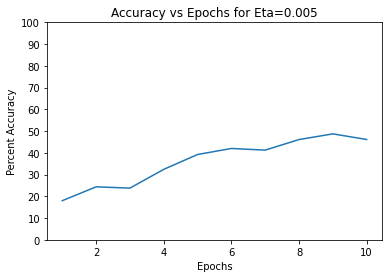

In [15]:
eps = np.arange(1, epochs+1)
plt.plot(eps, dnn.accuracy_list)
plt.xlabel('Epochs')
plt.ylabel('Percent Accuracy')
plt.title('Accuracy vs Epochs for Eta=0.005')
plt.yticks(np.arange(0, 110, 10))

In [ ]:
ers = np.arange(0, len(train_set))
plt.plot(ers, dnn.error_list)
plt.xlabel('Epochs')
plt.ylabel('Energy (Euclidean Distance)')
plt.title('Energy vs Epochs')